<a href="https://colab.research.google.com/github/SirGamah/Learning-Data-Science/blob/main/password_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSPIRATION
<p>Every day we sign up on websites or mobile apps which require us to provide passwords. We are to ensure that these passwords are hard to crack by hackers. But how do we know what <b>'bad password'</b> is? For this reason, <em>the National Institute of Standards and Technology</em>, (NIST) in the <a href="https://pages.nist.gov/800-63-3/sp800-63b.html">NIST Special Publication 800-63B</a> states what to use to make sure you are at least not using a <em>bad</em> password.</p>
<p>Taking the guidelines from NIST and adding other major ways of ensuring preventing bad passwords, and using a fictional company usernames and passwords, this project is going to check passwords that meet the following guidelines:</p>
<ul>
<li>Must be at least <b>8 charecters long</b></li>
<li>Must have at least <b>one digit</b></li>
<li>Must have at least <b>an alphabet</b></li>
<li>Must have at least one <b>upper case letter</b></li>
<li>Must have at least one <b>lower case lette</b>r</li>
<li>Must have at least a <b>special character</b></li>
<li>Must not have more than four <b>repeating charecters</b></li>
<li>Must not be a <b>common English word</b></li>
<li>Must not be in one of the <b>common passwords lists</b></li>
<li>Must not be the <b>name of the user</b></li>
</ul>

<p>The insight for this project and the <b>users CSV file</b> were obtained from this project on DataCamp: <a href = "https://app.datacamp.com/learn/projects/analyzing_password_strength">Bad Passwords and the NIST Guidelines</a>

**NOTE**: *The list of passwords and the fictional user database both contain real passwords leaked from real websites. These passwords have not been filtered in any way and include words that are explicit, derogatory and offensive*.

## Load Data

In [ ]:
# Upload `users` file
from google.colab import files
files.upload()

In [ ]:
# Import necessary libraries.
import pandas as pd
import re
import numpy
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

In [ ]:
# Loading in dataset
users = pd.read_csv('/content/users.csv')

# Taking a look at first 12 users
users.head(12)


,id,user_name,password
0,1,vance.jennings,joobheco
1,2,consuelo.eaton,0869347314
2,3,mitchel.perkins,fabypotter
3,4,odessa.vaughan,aharney88
4,5,araceli.wilder,acecdn3000
5,6,shawn.harrington,5278049
6,7,evelyn.gay,master
7,8,noreen.hale,murphy
8,9,gladys.ward,lwsves2
9,10,brant.zimmerman,1190KAREN5572497


In [ ]:
# Getting total users
print(len(users))

982


## Password Guidelines Analysis


In [ ]:
# Defining a funtion for ploting data
def plot_bar(col, title):
  col.value_counts().plot(kind = 'bar')
  plt.title(title)
  plt.xlabel('State of User')
  plt.xticks(rotation = 0)
  plt.ylabel('Count of Users')
  total = len(col)
  for i, value in enumerate(col.value_counts()):
    percentage = value / total * 100
    plt.annotate(f"{percentage:.1f}%", (i, value), ha='center', va='bottom')
  return plt.show()

### 1. Must be at least 8 characters long.

In [ ]:
# Calculating the lengths of users' passwords
users['length'] = users['password'].str.len()

# Flagging the users with too short passwords
users['too_short'] = users['length'] < 8

# Taking a look at the 12 first rows
users.head(12)

,id,user_name,password,length,too_short
0,1,vance.jennings,joobheco,8,False
1,2,consuelo.eaton,0869347314,10,False
2,3,mitchel.perkins,fabypotter,10,False
3,4,odessa.vaughan,aharney88,9,False
4,5,araceli.wilder,acecdn3000,10,False
5,6,shawn.harrington,5278049,7,True
6,7,evelyn.gay,master,6,True
7,8,noreen.hale,murphy,6,True
8,9,gladys.ward,lwsves2,7,True
9,10,brant.zimmerman,1190KAREN5572497,16,False


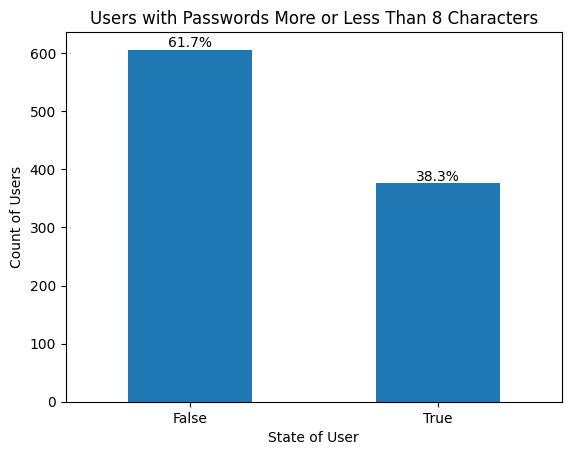

In [ ]:
# Visualizing
plot_bar(users['too_short'], 'Users with Passwords More or Less Than 8 Characters')

It can be observeed from the chart above that about **62%** of users have passwords more than 8 characters while **38%** do not.

### 2. Must have at least one digit


In [ ]:
# Flagging the users with passwords not having digits
users['has_number'] = users['password'].str.contains(r'\d+')

# Taking a look at the 12 first rows
users.head(12)

,id,user_name,password,length,too_short,has_number
0,1,vance.jennings,joobheco,8,False,False
1,2,consuelo.eaton,0869347314,10,False,True
2,3,mitchel.perkins,fabypotter,10,False,False
3,4,odessa.vaughan,aharney88,9,False,True
4,5,araceli.wilder,acecdn3000,10,False,True
5,6,shawn.harrington,5278049,7,True,True
6,7,evelyn.gay,master,6,True,False
7,8,noreen.hale,murphy,6,True,False
8,9,gladys.ward,lwsves2,7,True,True
9,10,brant.zimmerman,1190KAREN5572497,16,False,True


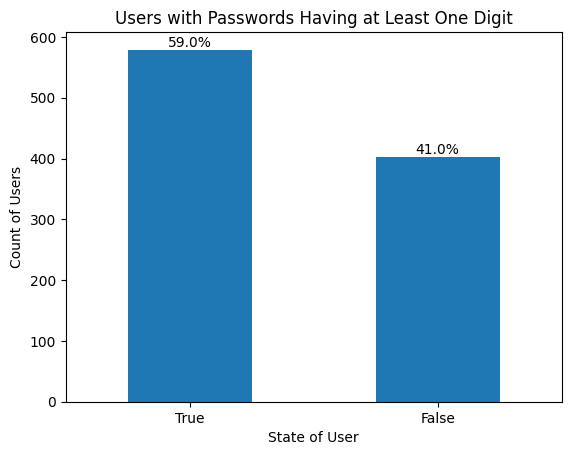

In [ ]:
# Visualizing
plot_bar(users['has_number'], 'Users with Passwords Having at Least One Digit')

It can be observed that **59%** of the users have at least one digit in their passwords while **41%** of them do not.

### 3. Must have at least an alphabet


In [ ]:
# Flagging the users with passwords not having alphabet
users['has_alphabet'] = users['password'].str.contains(r'[a-zA-Z]+')

# Taking a look at the 12 first rows
users.head(12)

,id,user_name,password,length,too_short,has_number,has_alphabet
0,1,vance.jennings,joobheco,8,False,False,True
1,2,consuelo.eaton,0869347314,10,False,True,False
2,3,mitchel.perkins,fabypotter,10,False,False,True
3,4,odessa.vaughan,aharney88,9,False,True,True
4,5,araceli.wilder,acecdn3000,10,False,True,True
5,6,shawn.harrington,5278049,7,True,True,False
6,7,evelyn.gay,master,6,True,False,True
7,8,noreen.hale,murphy,6,True,False,True
8,9,gladys.ward,lwsves2,7,True,True,True
9,10,brant.zimmerman,1190KAREN5572497,16,False,True,True


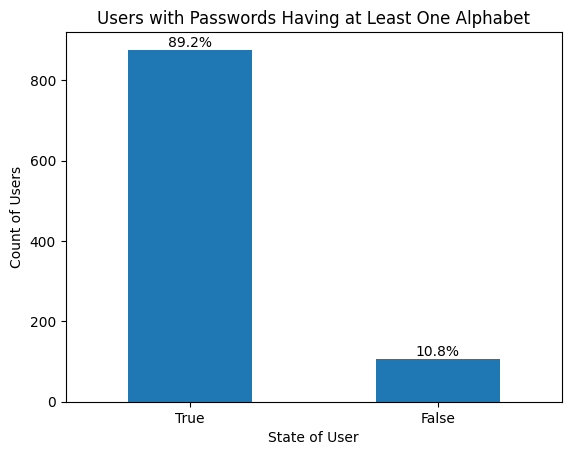

In [ ]:
# Visualizing
plot_bar(users['has_alphabet'], 'Users with Passwords Having at Least One Alphabet')

It can be observed that about **89%** of the users have at least one alphabet in their passwords while about **11%** do not.

### 4. Must have at least one upper case letter


In [ ]:
# Flagging the users with passwords having upper case letters
users['has_uppercase'] = users['password'].str.contains(r'[A-Z]+')

# Taking a look at the 12 first rows
users.head(12)

,id,user_name,password,length,too_short,has_number,has_alphabet,has_uppercase
0,1,vance.jennings,joobheco,8,False,False,True,False
1,2,consuelo.eaton,0869347314,10,False,True,False,False
2,3,mitchel.perkins,fabypotter,10,False,False,True,False
3,4,odessa.vaughan,aharney88,9,False,True,True,False
4,5,araceli.wilder,acecdn3000,10,False,True,True,False
5,6,shawn.harrington,5278049,7,True,True,False,False
6,7,evelyn.gay,master,6,True,False,True,False
7,8,noreen.hale,murphy,6,True,False,True,False
8,9,gladys.ward,lwsves2,7,True,True,True,False
9,10,brant.zimmerman,1190KAREN5572497,16,False,True,True,True


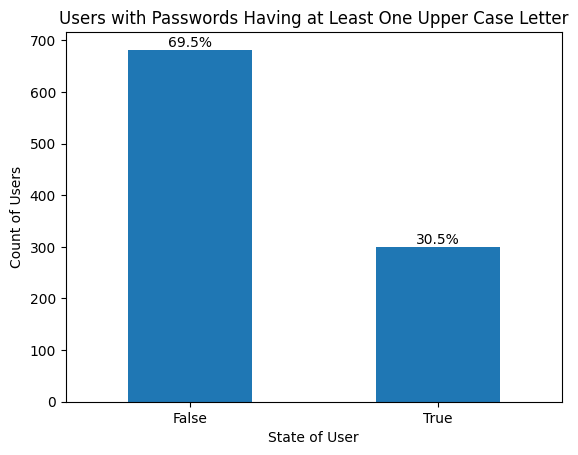

In [ ]:
# Visualizing
plot_bar(users['has_uppercase'], 'Users with Passwords Having at Least One Upper Case Letter')


It can be observed that about **31%** of the users have passwords that contain upper case letters while the others do not.

### 5. Must have at least one lower case letter


In [ ]:
# Flagging the users with passwords having lower case letters
users['has_lowercase'] = users['password'].str.contains(r'[a-z]+')

# Taking a look at the 12 first rows
users.head(12)

,id,user_name,password,length,too_short,has_number,has_alphabet,has_uppercase,has_lowercase
0,1,vance.jennings,joobheco,8,False,False,True,False,True
1,2,consuelo.eaton,0869347314,10,False,True,False,False,False
2,3,mitchel.perkins,fabypotter,10,False,False,True,False,True
3,4,odessa.vaughan,aharney88,9,False,True,True,False,True
4,5,araceli.wilder,acecdn3000,10,False,True,True,False,True
5,6,shawn.harrington,5278049,7,True,True,False,False,False
6,7,evelyn.gay,master,6,True,False,True,False,True
7,8,noreen.hale,murphy,6,True,False,True,False,True
8,9,gladys.ward,lwsves2,7,True,True,True,False,True
9,10,brant.zimmerman,1190KAREN5572497,16,False,True,True,True,False


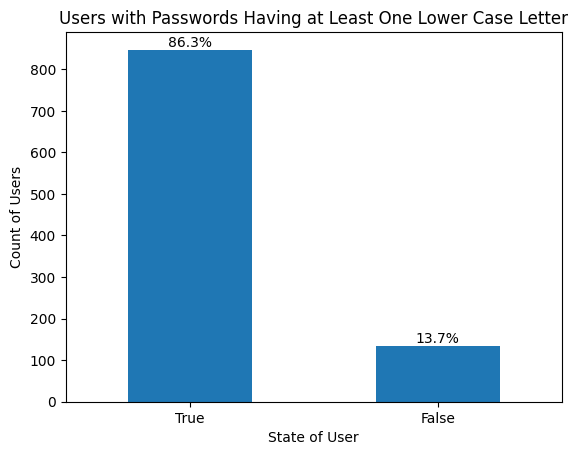

In [ ]:
# Visualizing
plot_bar(users['has_lowercase'], 'Users with Passwords Having at Least One Lower Case Letter')

It can be observed from here that about **86%** of the users have passwords that have at least one lower case letter in it while about **14%** do not meet this requirement.

### 6. Must have at least a special character


In [ ]:
# Flagging the users with passwords not having special characters
users['has_special_char'] = users['password'].str.contains(r'[!@#$%^&*(),.?":{}|<>]')

# Taking a look at the 12 first rows
users[users['has_special_char'] == True].head(12)

,id,user_name,password,length,too_short,has_number,has_alphabet,has_uppercase,has_lowercase,has_special_char
69,70,lavern.grimes,stanley#33,10,False,True,True,False,True,True
72,73,mona.frederick,1905bokyta13!,13,False,True,True,False,True,True
97,98,trinidad.rodriquez,Oli#2b,6,True,True,True,True,True,True
106,107,vera.macias,shy!,4,True,False,True,False,True,True
211,212,chris.barnes,jarchel#1,9,False,True,True,False,True,True
219,220,alexis.reynolds,dorkis*05,9,False,True,True,False,True,True
226,227,ilene.skinner,60642yahoo.com,14,False,True,True,False,True,True
373,374,beatrice.sparks,(kinds),7,True,False,True,False,True,True
382,383,marty.lynch,451..451,8,False,True,False,False,False,True
389,390,chase.trujillo,@paige@,7,True,False,True,False,True,True


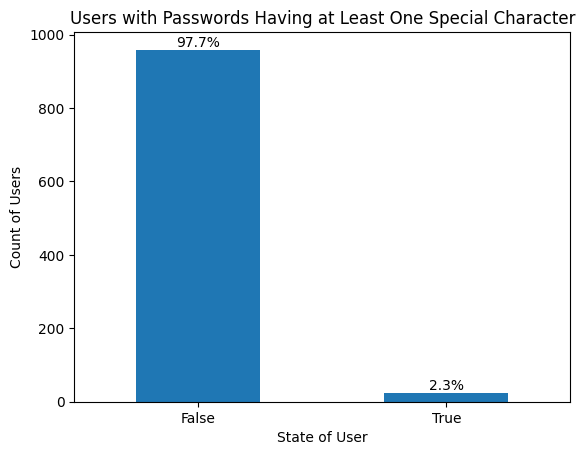

In [ ]:
# Visualizing
plot_bar(users['has_special_char'], 'Users with Passwords Having at Least One Special Character')

It can be observed from here that about **98%** of the users do not have passwords that have at least one special character in them while only about **2%** meet this requirement.

### 7. Must not be in one of the common passwords lists

In [ ]:
# Reading in a list of the most common passwords
common_password = pd.read_csv('https://gist.githubusercontent.com/akerl/fd2399a0d743869320b6/raw/9c9c2947e10cf55a426ed23006da5dcf624837c7/passwords.txt',
                              header = None, squeeze = True)

common_password.head()

0    00000000
1       00001
2    00001111
3      000099
4    00009999
Name: 0, dtype: object

In [ ]:
# Flagging the users with passwords that are common passwords
users['common_password'] = users['password'].str.lower().isin(common_password)

# Taking a look at the 12 first rows
users.head(12)

,id,user_name,password,length,too_short,has_number,has_alphabet,has_uppercase,has_lowercase,has_special_char,common_password
0,1,vance.jennings,joobheco,8,False,False,True,False,True,False,False
1,2,consuelo.eaton,0869347314,10,False,True,False,False,False,False,False
2,3,mitchel.perkins,fabypotter,10,False,False,True,False,True,False,False
3,4,odessa.vaughan,aharney88,9,False,True,True,False,True,False,False
4,5,araceli.wilder,acecdn3000,10,False,True,True,False,True,False,False
5,6,shawn.harrington,5278049,7,True,True,False,False,False,False,False
6,7,evelyn.gay,master,6,True,False,True,False,True,False,True
7,8,noreen.hale,murphy,6,True,False,True,False,True,False,True
8,9,gladys.ward,lwsves2,7,True,True,True,False,True,False,False
9,10,brant.zimmerman,1190KAREN5572497,16,False,True,True,True,False,False,False


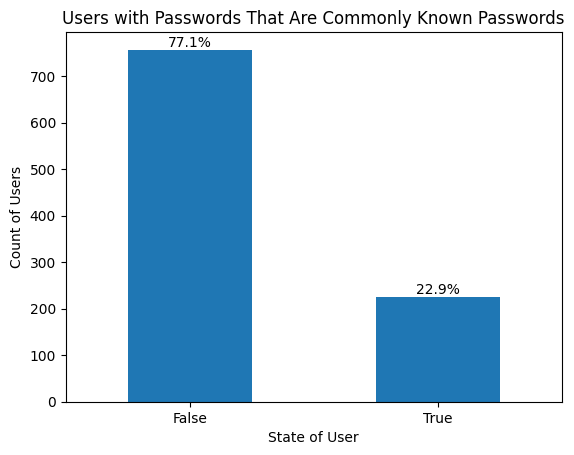

In [ ]:
# Visualizing
plot_bar(users['common_password'], 'Users with Passwords That Are Commonly Known Passwords')

It can be observed that about **77%** of the users use passwords that are not commonly known while about **23%** of the users have passwords that are commonly known passwords.

### 8. Must not be a common English word


In [ ]:
# Reading in a list of most common English words
common_words = pd.read_csv('https://raw.githubusercontent.com/dwyl/english-words/master/words_alpha.txt', header = None, squeeze = True)

common_words.head(10)

0         a
1        aa
2       aaa
3       aah
4     aahed
5    aahing
6      aahs
7       aal
8     aalii
9    aaliis
Name: 0, dtype: object

In [ ]:
# Flagging the users with passwords that are common English words
users['common_words'] = users['password'].str.lower().isin(common_words)

# Taking a look at the 12 first rows
users.head(12)

,id,user_name,password,length,too_short,has_number,has_alphabet,has_uppercase,has_lowercase,has_special_char,common_password,common_words
0,1,vance.jennings,joobheco,8,False,False,True,False,True,False,False,False
1,2,consuelo.eaton,0869347314,10,False,True,False,False,False,False,False,False
2,3,mitchel.perkins,fabypotter,10,False,False,True,False,True,False,False,False
3,4,odessa.vaughan,aharney88,9,False,True,True,False,True,False,False,False
4,5,araceli.wilder,acecdn3000,10,False,True,True,False,True,False,False,False
5,6,shawn.harrington,5278049,7,True,True,False,False,False,False,False,False
6,7,evelyn.gay,master,6,True,False,True,False,True,False,True,True
7,8,noreen.hale,murphy,6,True,False,True,False,True,False,True,True
8,9,gladys.ward,lwsves2,7,True,True,True,False,True,False,False,False
9,10,brant.zimmerman,1190KAREN5572497,16,False,True,True,True,False,False,False,False


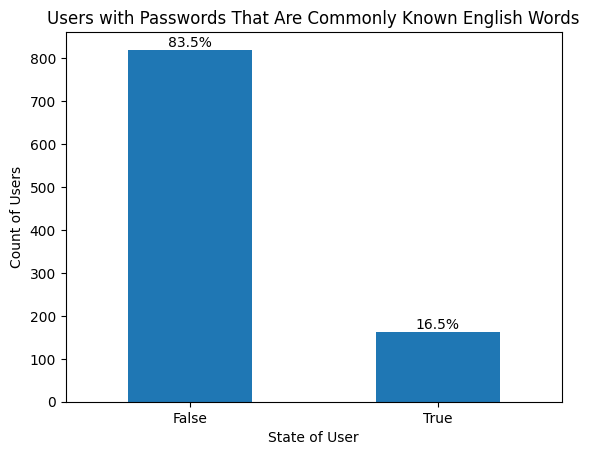

In [ ]:
# Visualizing
plot_bar(users['common_words'], 'Users with Passwords That Are Commonly Known English Words')

It can be observed that about **83.5%** of the users use passwords that are not commonly known English words while about **16.5%** of the users do.

### 9. Must not have more than four repeating charecters


In [ ]:
### Flagging the users with passwords with >= 4 repeats
users['too_many_repeats'] = users['password'].str.contains(r'(.)\1\1\1')

# Taking a look at the users with too many repeats
users[users['too_many_repeats']]

,id,user_name,password,length,too_short,has_number,has_alphabet,has_uppercase,has_lowercase,has_special_char,common_password,common_words,too_many_repeats
146,147,patti.dixon,555555,6,True,True,False,False,False,False,True,False,True
572,573,cornelia.bradley,555555,6,True,True,False,False,False,False,True,False,True
644,645,essie.lopez,11111,5,True,True,False,False,False,False,True,False,True
798,799,charley.key,888888,6,True,True,False,False,False,False,True,False,True
807,808,thurman.osborne,rinnnng0,8,False,True,True,False,True,False,False,False,True
941,942,mitch.ferguson,aaaaaa,6,True,False,True,False,True,False,True,False,True


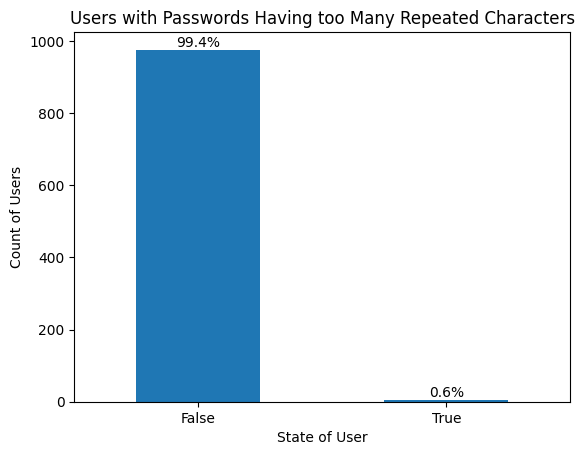

In [ ]:
# Visualizing
plot_bar(users['too_many_repeats'], 'Users with Passwords Having too Many Repeated Characters')

It can be observed that only **0.6%** of the users have passwords that have 4 or more repeating characters.

### 10. Must not be the name of the user

In [ ]:
# Extracting first and last names into their own columns
users['first_name'] = users['user_name'].str.extract(r'(^\w+)', expand = False)
users['last_name'] = users['user_name'].str.extract(r'(\w+$)', expand = False)

# Flagging the users with passwords that matches their names
users['uses_name'] = ((users['password'].str.lower() == users['first_name'])|
                     (users['password'].str.lower() == users['last_name']))

# Counting and printing the number of users using names as passwords
print(users['uses_name'].sum())

# Taking a look at the 12 first rows
users.head(12)

50


,id,user_name,password,length,too_short,has_number,has_alphabet,has_uppercase,has_lowercase,has_special_char,common_password,common_words,too_many_repeats,first_name,last_name,uses_name
0,1,vance.jennings,joobheco,8,False,False,True,False,True,False,False,False,False,vance,jennings,False
1,2,consuelo.eaton,0869347314,10,False,True,False,False,False,False,False,False,False,consuelo,eaton,False
2,3,mitchel.perkins,fabypotter,10,False,False,True,False,True,False,False,False,False,mitchel,perkins,False
3,4,odessa.vaughan,aharney88,9,False,True,True,False,True,False,False,False,False,odessa,vaughan,False
4,5,araceli.wilder,acecdn3000,10,False,True,True,False,True,False,False,False,False,araceli,wilder,False
5,6,shawn.harrington,5278049,7,True,True,False,False,False,False,False,False,False,shawn,harrington,False
6,7,evelyn.gay,master,6,True,False,True,False,True,False,True,True,False,evelyn,gay,False
7,8,noreen.hale,murphy,6,True,False,True,False,True,False,True,True,False,noreen,hale,False
8,9,gladys.ward,lwsves2,7,True,True,True,False,True,False,False,False,False,gladys,ward,False
9,10,brant.zimmerman,1190KAREN5572497,16,False,True,True,True,False,False,False,False,False,brant,zimmerman,False


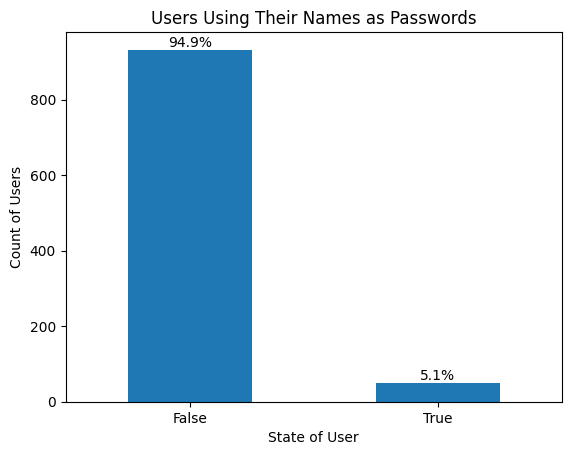

In [ ]:
# Visualizing
plot_bar(users['uses_name'], 'Users Using Their Names as Passwords')

It can be observed that about **5%** of the users have used their names/usernames as their passwords.

### Checking all bad passwords

In [ ]:
# Flagging all passwords that are bad
users['bad_password'] = (
    users['too_short'] |
    users['common_password'] |
    users['common_words'] |
    users['uses_name'] |
    users['too_many_repeats']
)


# Looking at the first 25 bad passwords
users[users['bad_password']].head(10)

,id,user_name,password,length,too_short,has_number,has_alphabet,has_uppercase,has_lowercase,has_special_char,common_password,common_words,too_many_repeats,first_name,last_name,uses_name,bad_password
5,6,shawn.harrington,5278049,7,True,True,False,False,False,False,False,False,False,shawn,harrington,False,True
6,7,evelyn.gay,master,6,True,False,True,False,True,False,True,True,False,evelyn,gay,False,True
7,8,noreen.hale,murphy,6,True,False,True,False,True,False,True,True,False,noreen,hale,False,True
8,9,gladys.ward,lwsves2,7,True,True,True,False,True,False,False,False,False,gladys,ward,False,True
11,12,milford.hubbard,hubbard,7,True,False,True,False,True,False,True,False,False,milford,hubbard,True,True
13,14,jamie.cochran,310356,6,True,True,False,False,False,False,True,False,False,jamie,cochran,False,True
15,16,lorrie.gay,oZ4k0QE,7,True,True,True,True,True,False,False,False,False,lorrie,gay,False,True
16,17,domingo.dyer,chelsea,7,True,False,True,False,True,False,True,False,False,domingo,dyer,False,True
17,18,martin.pacheco,zvc1939,7,True,True,True,False,True,False,False,False,False,martin,pacheco,False,True
18,19,shelby.massey,nickgd,6,True,False,True,False,True,False,False,False,False,shelby,massey,False,True


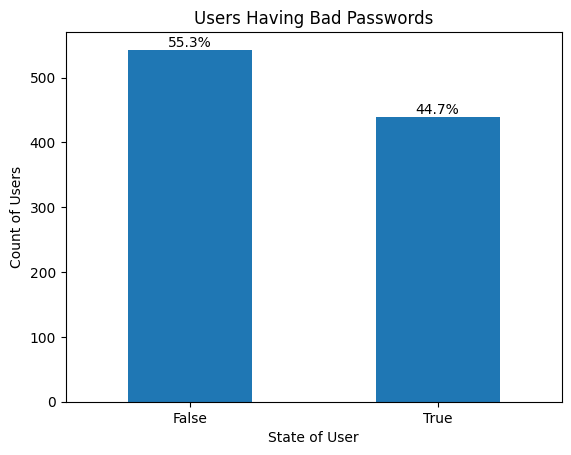

In [ ]:
# Visualizing
plot_bar(users['bad_password'], 'Users Having Bad Passwords')

It can be observed here that about **45%** of the users are using bad passwords

## Conclusion
From the analysis carried out, the following observation and conclusions can be observed from the users.
<ul>
<li>About 62% of users have passwords more than 8 characters while 38% do not.</li>
<li>59% of the users have at least one digit in their passwords while 41% of them do not.</li>
<li>About 89% of the users have at least one alphabet in their passwords while about 11% do not.</li>
<li>About 31% of the users have passwords that contain upper case letters while the others do not.</li>
<li>About 86% of the users have passwords that have at least one lower case letter in it while about 14% do not meet this requirement.</li>
<li>About 98% of the users do not have passwords that have at least one special character in them while only about 2% meet this requirement.</li>
<li>About 77% of the users use passwords that are not commonly known while about 23% of the users have passwords that are commonly known passwords.</li>
<li>About 83.5% of the users use passwords that are not commonly known English words while about 16.5% of the users</li>
<li>Only 0.6% of the users have passwords that have 4 or more repeating characters.</li>
<li>About 5% of the users have used their names/usernames as their passwords.</li>
<li>About 45% of the users are using bad passwords</li>
</ul>

# Reference
1. NIST Special Publication 800-63B - https://pages.nist.gov/800-63-3/sp800-63b.html
2. DataCamp Projects: Bad Passwords and the NIST Guidelines - https://app.datacamp.com/learn/projects/analyzing_password_strength
3. Common Password List Text - https://gist.githubusercontent.com/akerl/fd2399a0d743869320b6/raw/9c9c2947e10cf55a426ed23006da5dcf624837c7/passwords.txt
4. Common English Words Text - https://raw.githubusercontent.com/dwyl/english-words/master/words_alpha.txt